11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.3910 - val_loss: 0.1869
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1778 - val_loss: 0.1530
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1486 - val_loss: 0.1329
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1307 - val_loss: 0.1203
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1192 - val_loss: 0.1118
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1118 - val_loss: 0.1057
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1057 - val_loss: 0.1014
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1017 - val_loss: 0.0984
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0992 - val_loss: 0.0962
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0972 - val_loss: 0.0949
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0961 - val_loss:

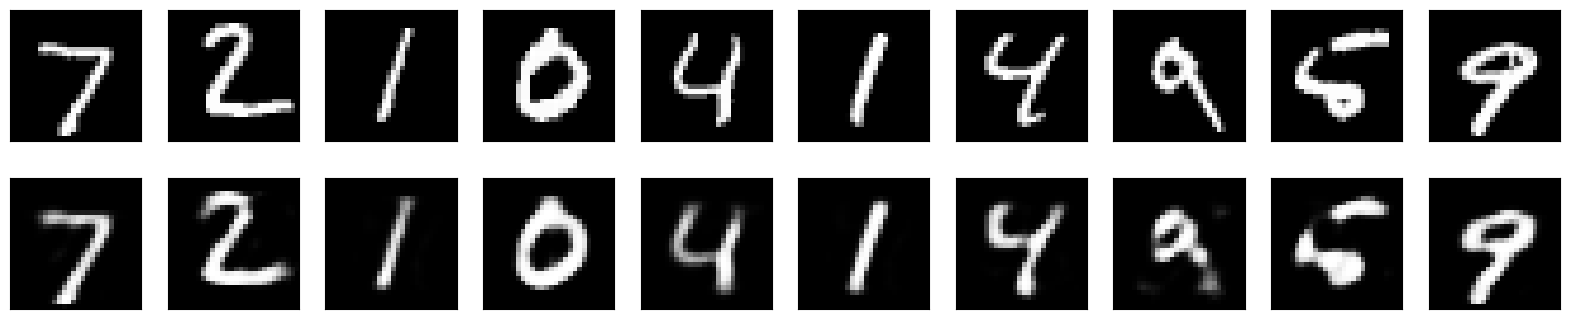

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the images to the range [0, 1] and flatten them into 784-dimensional vectors
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 784))  # 28*28 = 784
x_test = x_test.reshape((x_test.shape[0], 784))

# Define the autoencoder model
def build_autoencoder(input_dim, encoding_dim):
    # Encoder
    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)

    # Decoder
    decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

    # Create the autoencoder model
    autoencoder = models.Model(input_layer, decoded)

    # Create the encoder model (for extracting encoded data)
    encoder = models.Model(input_layer, encoded)

    # Create the decoder model
    encoded_input = layers.Input(shape=(encoding_dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = models.Model(encoded_input, decoder_layer(encoded_input))

    # Compile the autoencoder model
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder, encoder, decoder

# Model parameters
input_dim = 784  # Input size for flattened 28x28 images
encoding_dim = 32  # Dimensionality of the encoded representation

# Build the model
autoencoder, encoder, decoder = build_autoencoder(input_dim, encoding_dim)

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Evaluate the model
loss = autoencoder.evaluate(x_test, x_test)
print(f"Test loss: {loss}")

# To visualize some reconstructed images
decoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0380 - val_loss: 0.0170
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0162 - val_loss: 0.0145
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0141 - val_loss: 0.0135
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0131 - val_loss: 0.0127
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0125 - val_loss: 0.0124
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0122 - val_loss: 0.0121
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0117 - val_loss: 0.0118
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0114 - val_loss: 0.0115
Epoch 9/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0112 - val_loss: 0.0114
Epoch 10/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0110 - val_loss: 0.0112
Epoch 11/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0110 - val_loss: 0.0111
Epoch 12/20
1719/1719 

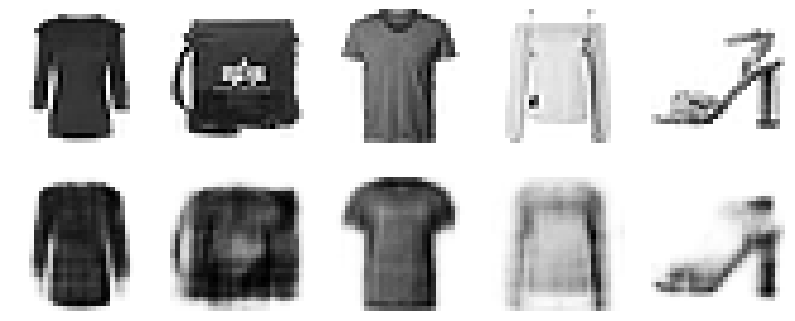

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

# Split into training and validation sets
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# Define encoder
encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
])

# Define decoder
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[30]),
    tf.keras.layers.Dense(28 * 28, activation="sigmoid"),
    tf.keras.layers.Reshape([28, 28])
])

# Combine encoder and decoder
autoencoder = tf.keras.Sequential([encoder, decoder])

# Compile and train
autoencoder.compile(loss="mse", optimizer=tf.keras.optimizers.Nadam())
history = autoencoder.fit(X_train, X_train, epochs=20,
                          validation_data=(X_valid, X_valid))

# Optional: visualize some reconstructions
def show_reconstructions(model, images, n=5):
    reconstructions = model.predict(images[:n])
    plt.figure(figsize=(n * 2, 4))
    for i in range(n):
        # Original
        plt.subplot(2, n, i + 1)
        plt.imshow(images[i], cmap="binary")
        plt.axis("off")
        # Reconstructed
        plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructions[i], cmap="binary")
        plt.axis("off")
    plt.show()

show_reconstructions(autoencoder, X_valid)


In [3]:
train_loss = autoencoder.evaluate(X_train, X_train)
test_loss = autoencoder.evaluate(X_test, X_test)
print(f"Train MSE: {train_loss:.4f}")
print(f"Test MSE: {test_loss:.4f}")

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0102
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0104
Train MSE: 0.0103
Test MSE: 0.0105
